## EDA of Zomato Bangalore Restaurant

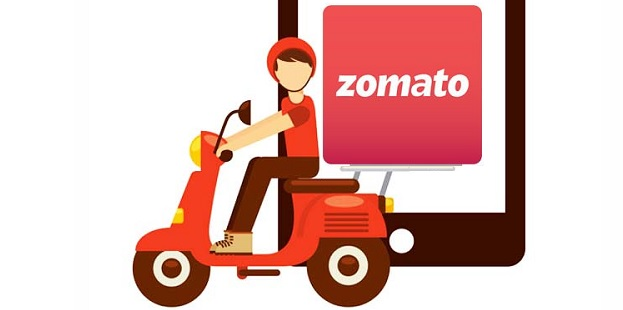

Analyzing the Zomato dataset gives a fair idea about the factors affecting the establishment of different types of restaurants at different places in Bengaluru, as well as the aggregate rating of each restaurant. Bengaluru, being one such city, has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening, the industry hasn’t been saturated yet and the demand is increasing day by day. In spite of the increasing demand, however, it has become difficult for new restaurants to compete with established restaurants, most of them serving the same food. Bengaluru being the IT capital of India, most of the people here are dependent mainly on restaurant food as they don’t have time to cook for themselves.

### Importing Required Libraries :

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [81]:
df = pd.read_csv('zomato.csv')

## Data Preprocessing

- First, we will check shape of the dataset
- Second, we will take a look on head of the dataset
- then, prepocessing on dataset with some important features

In [82]:
df.shape

(51717, 17)

In [83]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

- So here we observed that, we don't need columns like url, address and phone so drop them
- Also, here some of the column names are too long so just rename that

In [85]:
df.drop(['url','address','phone'],axis=1,inplace=True)

In [86]:
df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   dish_liked    23639 non-null  object
 8   cuisines      51672 non-null  object
 9   cost          51371 non-null  object
 10  reviews_list  51717 non-null  object
 11  menu_item     51717 non-null  object
 12  type          51717 non-null  object
 13  city          51717 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.5+ MB


In [87]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate             7775
votes               0
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost              346
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

In [88]:
# drop duplicate values from dataset

df.drop_duplicates(inplace=True)

In [94]:
# take a look on rate column

df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.5, 2.6, 3.4, 4.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [90]:
# Here, we can see that some of unique values are 'NEW' and '-' so we can drop it

df.drop(df[df['rate']=='NEW'].index,axis=0,inplace=True)
df.drop(df[df['rate']=='-'].index,inplace=True)

In [91]:
# Fill null values with '2.5/5'

df['rate']=df['rate'].fillna('2.5/5')
df['rate'].isnull().sum()

0

In [92]:
# Split the data of column 'rate' and take 0th index of it

df['rate']=df['rate'].apply(lambda x:x.split('/')[0]).astype(float)

In [93]:
# let's take a look again on info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49387 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          49387 non-null  object 
 1   online_order  49387 non-null  object 
 2   book_table    49387 non-null  object 
 3   rate          49387 non-null  float64
 4   votes         49387 non-null  int64  
 5   location      49366 non-null  object 
 6   rest_type     49162 non-null  object 
 7   dish_liked    23480 non-null  object 
 8   cuisines      49342 non-null  object 
 9   cost          49047 non-null  object 
 10  reviews_list  49387 non-null  object 
 11  menu_item     49387 non-null  object 
 12  type          49387 non-null  object 
 13  city          49387 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.7+ MB


In [95]:
# now change the data type of cost column

df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', nan, '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [96]:
# check null value and drop it

df['cost'].isnull().sum()

340

In [97]:
df.dropna(subset=['cost'],inplace=True)

In [98]:
df['cost']=df['cost'].apply(lambda x:x.replace(',','')).astype(int)

### From all the Data available, we can bring out some neat insights or conclusions such as

- Most famous restaurant chains in Bengaluru
- Restaurants delivering Online or not
- Restaurants allowing table booking or not
- Table booking vs Rate
- Rate vs Cost with respect to Table booking
- Relation between Location and Rating
- Restaurant Type
- Types of Services
- Relation between Type and Rating
- Cost of Restaurant
- No. of restaurants in a Location
- Restaurant type

## Top 10 Restaurants Chains

In [101]:
# firstly, take top 10 Restaurants from column-name

chains=df['name'].value_counts()[:10]
print(chains)

Cafe Coffee Day      93
Onesta               85
Just Bake            72
Five Star Chicken    70
Empire Restaurant    69
Kanti Sweets         68
Baskin Robbins       63
Petoo                62
Polar Bear           62
Pizza Hut            60
Name: name, dtype: int64


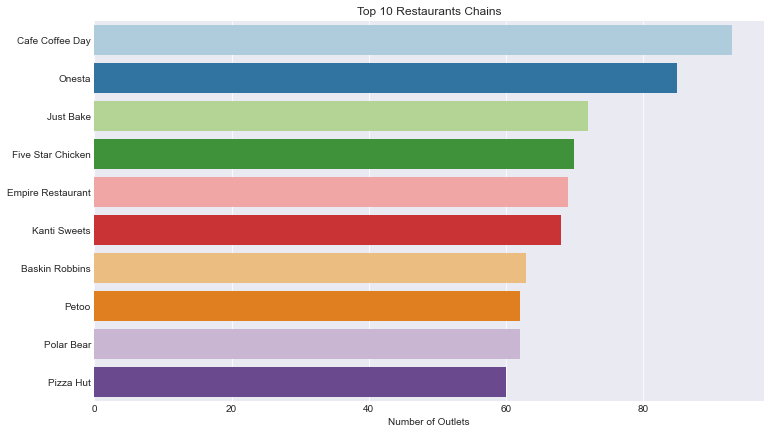

In [102]:
plt.figure(figsize=(12,7))

sns.barplot(x=chains,y=chains.index,palette='Paired')
plt.title('Top 10 Restaurants Chains')
plt.xlabel('Number of Outlets')
plt.show()

- Observing the figure, it's clear that Cafe Coffee Day has highest reviews and also the most famous one.

## Restaurants delivering Online or not

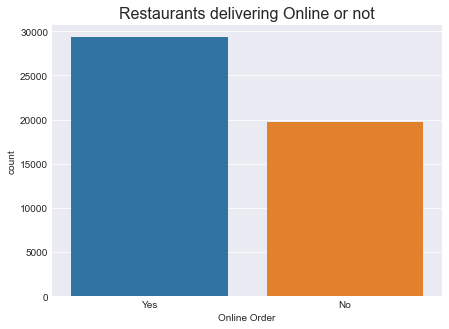

In [103]:
plt.figure(figsize=(7,5))
sns.countplot(df['online_order'])
plt.title('Restaurants delivering Online or not',fontsize=16)
plt.xlabel('Online Order')
plt.show()

- Most of the restaurants has been tied with Zomato delivery service and take online orders.

## Restaurants allowing table booking or not

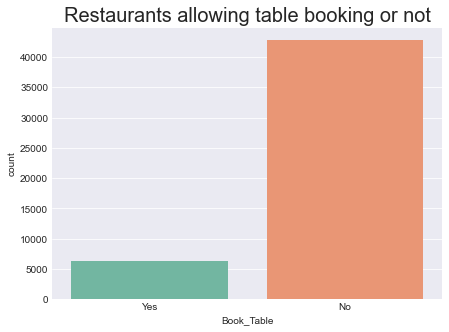

In [116]:
plt.figure(figsize=(7,5))
sns.countplot(df['book_table'], palette='Set2')
plt.title('Restaurants allowing table booking or not', fontsize=20)
plt.xlabel('Book_Table')
plt.show()

- Most of the restaurants has not allow to book table. 

## Boxplot - Table Booking vs Rate

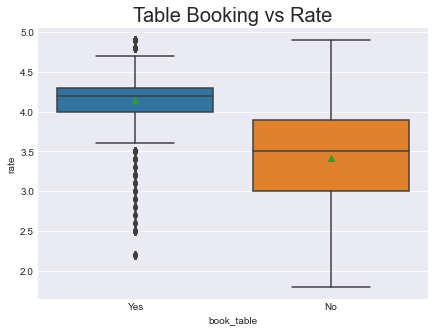

In [117]:
plt.figure(figsize=(7,5))
sns.boxplot(df['book_table'],df['rate'],showmeans =True)
plt.title('Table Booking vs Rate',fontsize=20)
plt.show()

In [118]:
df.groupby('book_table')['rate'].mean().reset_index()

,book_table,rate
0,No,3.420229
1,Yes,4.139575


- The avarage of rate of table booking is more.

## Scatter plot of Rate vs Cost with respect to Table booking 

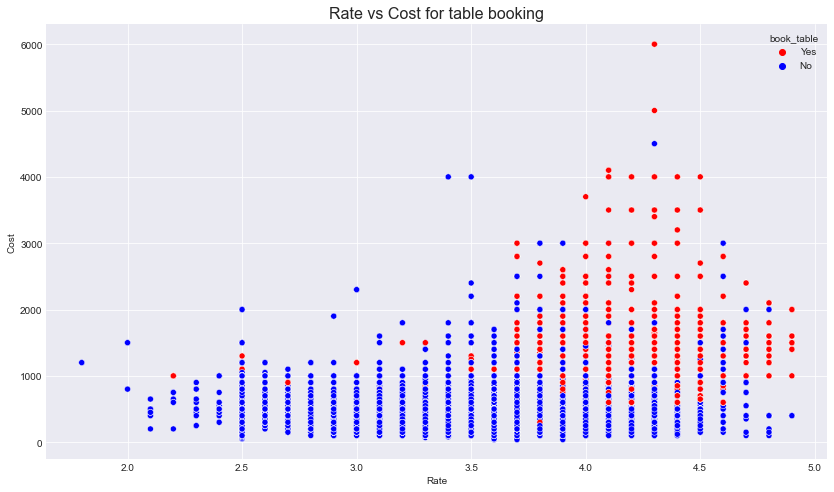

In [30]:
plt.figure(figsize=(14,8))
sns.scatterplot(df['rate'],df['cost'],hue=df['book_table'],palette=['r','b'])
plt.title('Rate vs Cost for table booking',fontsize=16)
plt.xlabel('Rate')
plt.ylabel('Cost')
plt.show()

- Observing above figure, cost of table booking is higher with good ratings

## Location with Top Rate 

In [120]:
df_loc_rate = df.groupby('location')['rate'].mean().reset_index()
df1 = df_loc_rate.query('rate > 3.7')

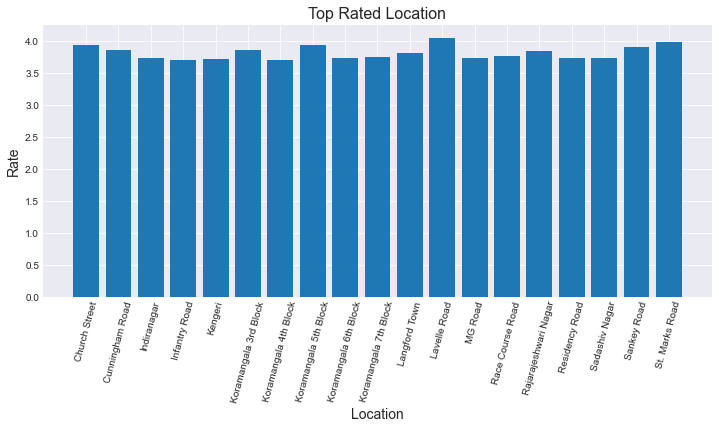

In [121]:
plt.figure(figsize=(12,5))
plt.bar(df1['location'],df1['rate'])
plt.xticks(rotation = 75)
plt.title('Top Rated Location',fontsize=16)
plt.xlabel('Location',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.show()

- Lavelle Road has highest Rate in all top locations

In [33]:
# let's count rating on specific intervals 
poor_rate = (df['rate'] >= 0.0) & (df['rate'] <2.0)
avg_rate = (df['rate'] >= 2.0) & (df['rate'] < 3.0)
good_rate = (df['rate'] >= 3.0) & (df['rate'] < 4.0)
exc_rate = (df['rate'] >= 4.0)

In [34]:
print('Poor Rating : ',poor_rate.sum())
print('Average Rating :',avg_rate.sum())
print('Good Rating : ',good_rate.sum())
print('Excellent Rating :',exc_rate.sum())

Poor Rating :  5
Average Rating : 9910
Good Rating :  26831
Excellent Rating : 12301


## Pie - To check the rate count percentage on each rating categories

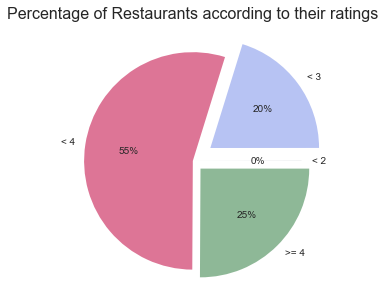

In [35]:
plt.figure(figsize=(5,5))
slices=[poor_rate.sum(),avg_rate.sum(),good_rate.sum(),exc_rate.sum()]
label=['< 2','< 3','< 4','>= 4']
explode=[0,0.2,0,0.1]
colors=['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie(slices,explode=explode,labels=label,autopct='%1.0f%%',colors=colors)
plt.title('Percentage of Restaurants according to their ratings',fontsize=16)
plt.show()

- From the figure, we can say that the rate column has 0% for less than 2 rating, 20% for less than 3 rating, 55% for less than 4 rating and 25% for >=4 rating.

## Restaurant Type

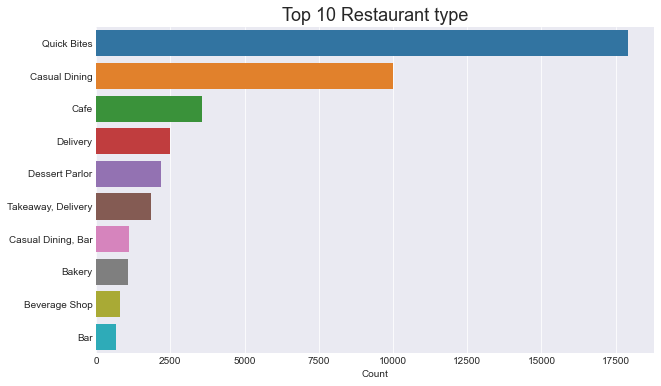

In [123]:
# let's compute firstly top 10 Restaurant types and visualize them

rest_types = df['rest_type'].value_counts()[:10]

plt.figure(figsize=(10,6))
sns.barplot(rest_types,rest_types.index)
plt.title('Top 10 Restaurant type',fontsize=18)
plt.xlabel('Count')
plt.show()

- It's Shows that most of the restaurants are of Quick bites type

## Distplot of Rate

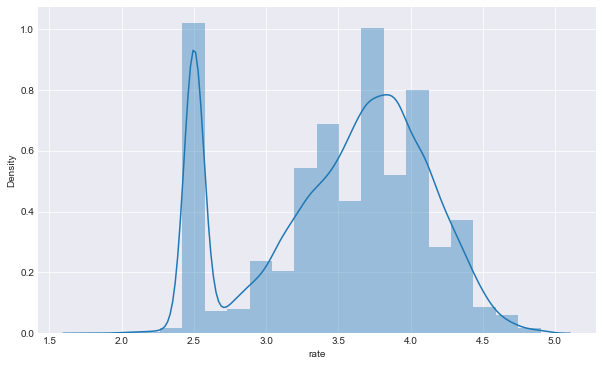

In [124]:
plt.figure(figsize=(10,6))
sns.distplot(df['rate'],bins=20,kde=True)
plt.show()

## Type of Services

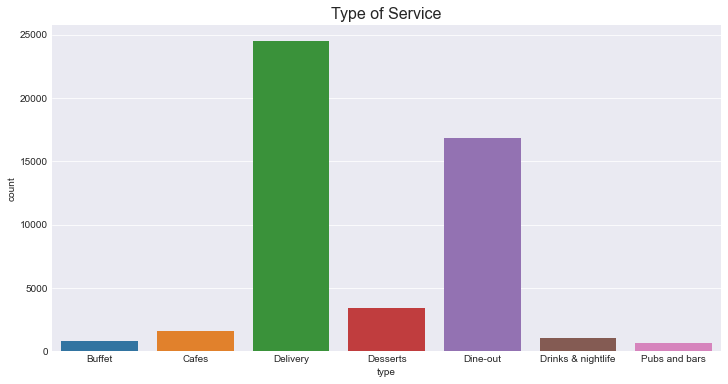

In [125]:
plt.figure(figsize=(12,6))
sns.countplot(df['type'])
plt.title('Type of Service',fontsize=16)
plt.show()

- It's Shows that most of the restaurants are available for Food Deliveries

## Cost of Restaurant

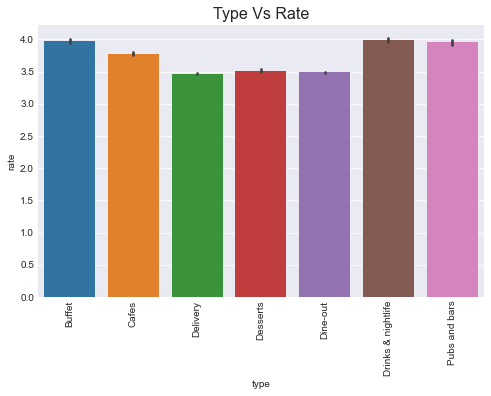

In [126]:
plt.figure(figsize=(8,5))
sns.barplot(df['type'],df['rate'])
plt.title('Type Vs Rate',fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

- Buffet, Drinks - nightlife and pubs - bars are high rated Restaurant types

In [137]:
df.dropna(subset=['dish_liked'],inplace=True)

In [139]:
#re=regular expression (use for splitting words)

import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

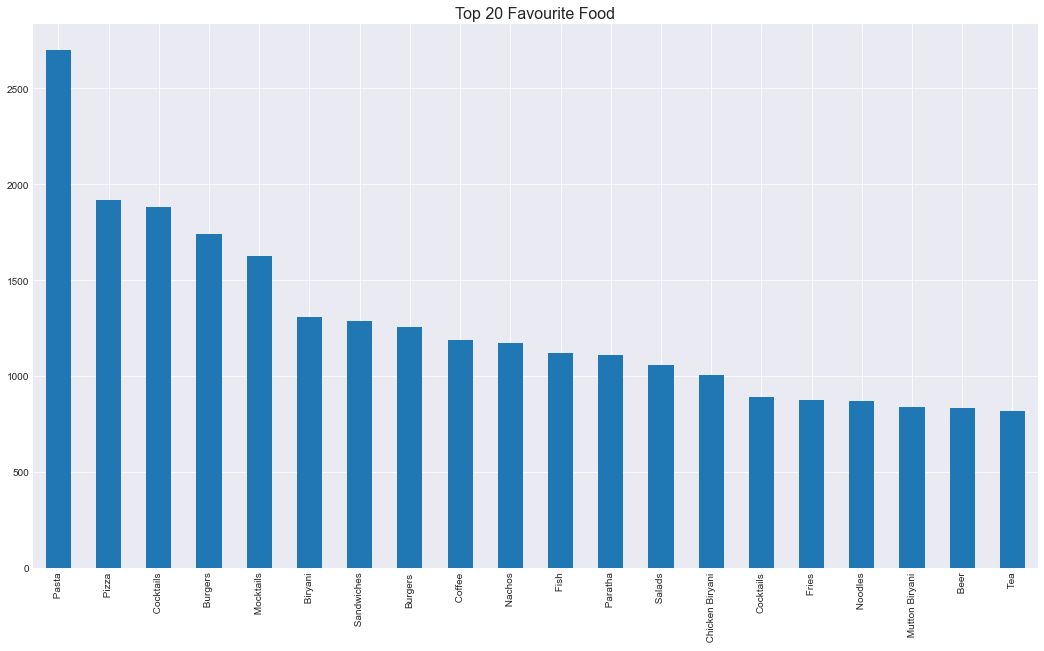

In [156]:
pd.Series(likes).value_counts()[:20].plot(kind = 'bar', figsize=(18,10))
plt.title('Top 20 Favourite Food', fontsize=16)
plt.show()

- Here, observing that Pasta is most favourite Food like by Bengaluru peoples